In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
df = pd.read_csv('Data/ze_2020april.csv')
df.order_datetime = pd.to_datetime(df.order_datetime)
df.head()

,order_nk,product_nk,bundle_nk,order_datetime,customer_bk,unit_quantity,unit_gross_revenue_local
0,4065368,8527,8527,2020-04-01 18:41:30.391566,4d4c917353487a2ad8204cfda07cad55fa3080bf99fc32...,15,32.3400
1,4075497,9289,9289,2020-04-01 23:07:55.441251,a845763566e10c074b4a3aeb043dd94071678c7425fb6d...,8,31.1100
2,4064491,8579,8579,2020-04-01 18:21:09.778727,d77af4458b7c9667e669375c2cac2139e695f778edac28...,60,183.3900
3,4075473,8610,8610,2020-04-01 23:06:47.516061,2ba3ebb8a210de46b1f8788ac7a51f72de9e8fcef62eb7...,12,37.4700
4,4064513,8583,8583,2020-04-01 18:21:46.593124,fe107232c23528f978d653e180fca870ab01080ad1e168...,30,71.4178


In [483]:
df.shape

(2214988, 7)

In [3]:
df2 = pd.read_csv('Data/ze_items.csv')
df2.head()

,product_nk,is_bundle,is_abi,is_active,is_test,name,category,brand,sku,units_per_sku,is_returnable_glass_bottle,product_id
0,9284.0,NaN,False,NaN,NaN,"Sorvete Pote Flocos Nestle 1,5L",Outros,NaN,NaN,NaN,False,9651
1,9297.0,NaN,False,NaN,NaN,"Sorvete Pote Passas ao Rum Nestle 1,5l",Outros,NaN,NaN,NaN,False,9664
2,9298.0,NaN,False,NaN,NaN,"Sorvete Pote Creme Nestle 1,5l",Outros,NaN,NaN,NaN,False,9665
3,8590.0,NaN,True,NaN,NaN,Brahma Extra Weiss 355ml - Pack com 6 Unidades,Cervejas,Brahma,14120.0,6.0,False,8956
4,9302.0,NaN,False,NaN,NaN,Saco de Gelo (Escama) - 20kg,Outros,NaN,NaN,NaN,False,9669


df2[!math.isnan(df2['brand'])]

print(df2.is_bundle.value_counts())
print(df2.is_active.value_counts())
print(df2.is_test.value_counts())
-> Search for single command for columns with all nan

df2.drop(columns=['is_bundle', 'is_active', 'is_test'], inplace=True)
df2.head()

In [5]:
df2.dropna(how='all', axis='columns', inplace=True)
df2.head()

,product_nk,is_abi,name,category,brand,sku,units_per_sku,is_returnable_glass_bottle,product_id
0,9284.0,False,"Sorvete Pote Flocos Nestle 1,5L",Outros,NaN,NaN,NaN,False,9651
1,9297.0,False,"Sorvete Pote Passas ao Rum Nestle 1,5l",Outros,NaN,NaN,NaN,False,9664
2,9298.0,False,"Sorvete Pote Creme Nestle 1,5l",Outros,NaN,NaN,NaN,False,9665
3,8590.0,True,Brahma Extra Weiss 355ml - Pack com 6 Unidades,Cervejas,Brahma,14120.0,6.0,False,8956
4,9302.0,False,Saco de Gelo (Escama) - 20kg,Outros,NaN,NaN,NaN,False,9669


In [6]:
for i in range(df2.shape[0]):
    if math.isnan(df2.sku[i]):
        df2.sku.iloc[i] = -1
    if math.isnan(df2.units_per_sku[i]):
        df2.units_per_sku.iloc[i] = -1
df2.head()

c:\program files\python38\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,product_nk,is_abi,name,category,brand,sku,units_per_sku,is_returnable_glass_bottle,product_id
0,9284.0,False,"Sorvete Pote Flocos Nestle 1,5L",Outros,NaN,-1.0,-1.0,False,9651
1,9297.0,False,"Sorvete Pote Passas ao Rum Nestle 1,5l",Outros,NaN,-1.0,-1.0,False,9664
2,9298.0,False,"Sorvete Pote Creme Nestle 1,5l",Outros,NaN,-1.0,-1.0,False,9665
3,8590.0,True,Brahma Extra Weiss 355ml - Pack com 6 Unidades,Cervejas,Brahma,14120.0,6.0,False,8956
4,9302.0,False,Saco de Gelo (Escama) - 20kg,Outros,NaN,-1.0,-1.0,False,9669


In [7]:
for i in range(df2.shape[0]):
    if not isinstance(df2.brand.iloc[i], str):
        df2.brand.iloc[i] = 'Not Listed'
df2.head()

,product_nk,is_abi,name,category,brand,sku,units_per_sku,is_returnable_glass_bottle,product_id
0,9284.0,False,"Sorvete Pote Flocos Nestle 1,5L",Outros,Not Listed,-1.0,-1.0,False,9651
1,9297.0,False,"Sorvete Pote Passas ao Rum Nestle 1,5l",Outros,Not Listed,-1.0,-1.0,False,9664
2,9298.0,False,"Sorvete Pote Creme Nestle 1,5l",Outros,Not Listed,-1.0,-1.0,False,9665
3,8590.0,True,Brahma Extra Weiss 355ml - Pack com 6 Unidades,Cervejas,Brahma,14120.0,6.0,False,8956
4,9302.0,False,Saco de Gelo (Escama) - 20kg,Outros,Not Listed,-1.0,-1.0,False,9669


In [8]:
data_df = pd.merge(df, df2, how='left', on=['product_nk'])
data_df.head()

,order_nk,product_nk,bundle_nk,order_datetime,customer_bk,unit_quantity,unit_gross_revenue_local,is_abi,name,category,brand,sku,units_per_sku,is_returnable_glass_bottle,product_id
0,4065368,8527,8527,2020-04-01 18:41:30.391566,4d4c917353487a2ad8204cfda07cad55fa3080bf99fc32...,15,32.3400,True,Antarctica Subzero 269ml - Unidade,Cervejas,Antarctica,11503.0,1.0,False,8893.0
1,4075497,9289,9289,2020-04-01 23:07:55.441251,a845763566e10c074b4a3aeb043dd94071678c7425fb6d...,8,31.1100,True,Bohemia 473ml,Cervejas,Bohemia,17266.0,1.0,False,9656.0
2,4064491,8579,8579,2020-04-01 18:21:09.778727,d77af4458b7c9667e669375c2cac2139e695f778edac28...,60,183.3900,True,Budweiser 350ml - Unidade,Cervejas,Budweiser,11368.0,1.0,False,8945.0
3,4075473,8610,8610,2020-04-01 23:06:47.516061,2ba3ebb8a210de46b1f8788ac7a51f72de9e8fcef62eb7...,12,37.4700,True,Bohemia 350ml - Unidade,Cervejas,Bohemia,9072.0,1.0,False,8976.0
4,4064513,8583,8583,2020-04-01 18:21:46.593124,fe107232c23528f978d653e180fca870ab01080ad1e168...,30,71.4178,True,Stella Artois 269ml,Cervejas,Stella Artois,1699.0,1.0,False,8949.0


In [505]:
data_df.shape[0]

2214988

In [9]:
data_df[data_df.product_nk != data_df.bundle_nk]
# Check if it works without :

,order_nk,product_nk,bundle_nk,order_datetime,customer_bk,unit_quantity,unit_gross_revenue_local,is_abi,name,category,brand,sku,units_per_sku,is_returnable_glass_bottle,product_id


In [10]:
data_df.columns

Index(['order_nk', 'product_nk', 'bundle_nk', 'order_datetime', 'customer_bk',
       'unit_quantity', 'unit_gross_revenue_local', 'is_abi', 'name',
       'category', 'brand', 'sku', 'units_per_sku',
       'is_returnable_glass_bottle', 'product_id'],
      dtype='object')

In [11]:
data_df.drop(columns=['bundle_nk'], inplace=True)
cols = ['order_datetime', 'order_nk', 'customer_bk', 'product_nk', 'name', 'category', 'brand', 'unit_quantity', 'unit_gross_revenue_local', 'is_abi',
        'sku', 'units_per_sku', 'is_returnable_glass_bottle', 'product_id']
data_df = data_df[cols]
# data_df['customer_bk'] = data_df['customer_bk'].str.slice(18,30)
data_df.head()

,order_datetime,order_nk,customer_bk,product_nk,name,category,brand,unit_quantity,unit_gross_revenue_local,is_abi,sku,units_per_sku,is_returnable_glass_bottle,product_id
0,2020-04-01 18:41:30.391566,4065368,4d4c917353487a2ad8204cfda07cad55fa3080bf99fc32...,8527,Antarctica Subzero 269ml - Unidade,Cervejas,Antarctica,15,32.3400,True,11503.0,1.0,False,8893.0
1,2020-04-01 23:07:55.441251,4075497,a845763566e10c074b4a3aeb043dd94071678c7425fb6d...,9289,Bohemia 473ml,Cervejas,Bohemia,8,31.1100,True,17266.0,1.0,False,9656.0
2,2020-04-01 18:21:09.778727,4064491,d77af4458b7c9667e669375c2cac2139e695f778edac28...,8579,Budweiser 350ml - Unidade,Cervejas,Budweiser,60,183.3900,True,11368.0,1.0,False,8945.0
3,2020-04-01 23:06:47.516061,4075473,2ba3ebb8a210de46b1f8788ac7a51f72de9e8fcef62eb7...,8610,Bohemia 350ml - Unidade,Cervejas,Bohemia,12,37.4700,True,9072.0,1.0,False,8976.0
4,2020-04-01 18:21:46.593124,4064513,fe107232c23528f978d653e180fca870ab01080ad1e168...,8583,Stella Artois 269ml,Cervejas,Stella Artois,30,71.4178,True,1699.0,1.0,False,8949.0


In [12]:
dt_range = data_df.order_datetime.max() - data_df.order_datetime.min()
print(data_df.order_datetime.min(), '\t to\t', data_df.order_datetime.max())

2020-04-01 00:00:14.128794 	 to	 2020-05-05 01:45:03.338393


In [13]:
data_df = data_df[data_df['order_datetime'].dt.month==4]
data_df.tail()

,order_datetime,order_nk,customer_bk,product_nk,name,category,brand,unit_quantity,unit_gross_revenue_local,is_abi,sku,units_per_sku,is_returnable_glass_bottle,product_id
2214983,2020-04-02 17:18:40.409366,4085579,71bb6233495b92453f36e9545de7dfea48a68d79c0d64e...,8973,Saco de Gelo em Cubos - 2kg,Outros,Not Listed,1,4.5706,False,-1.0,-1.0,False,9339.0
2214984,2020-04-02 17:18:40.409366,4085579,71bb6233495b92453f36e9545de7dfea48a68d79c0d64e...,8595,Skol Beats Secret 269ml,Cervejas,Skol,1,3.9879,True,15132.0,1.0,False,8961.0
2214985,2020-04-02 17:18:40.409366,4085579,71bb6233495b92453f36e9545de7dfea48a68d79c0d64e...,8886,Sukita 2L,Sem álcool,Not Listed,1,4.5706,True,503.0,1.0,False,9252.0
2214986,2020-04-02 17:18:40.409366,4085579,71bb6233495b92453f36e9545de7dfea48a68d79c0d64e...,9468,Skol Puro Malte 473ml - Unidade,Cervejas,Skol,2,6.3760,True,18676.0,1.0,False,9835.0
2214987,2020-04-02 17:17:43.032043,4085534,01a455edb16ae73c0c11ee5d4e83a75d8bcf7eec2b0406...,8762,Antarctica Pilsen 1L | Vasilhame Incluso - Uni...,Cervejas,Antarctica,3,33.5100,True,1748.0,1.0,False,9128.0


In [14]:
data_df.sort_values(by='order_datetime', inplace=True)
data_df.index = range(data_df.shape[0])
print(data_df.shape[0])
data_df.head()

1830048


,order_datetime,order_nk,customer_bk,product_nk,name,category,brand,unit_quantity,unit_gross_revenue_local,is_abi,sku,units_per_sku,is_returnable_glass_bottle,product_id
0,2020-04-01 00:00:14.128794,4055605,bf3354003b5bf5328fef442ce4b431fe480503f0f978d1...,9303,Budweiser 330ml,Cervejas,Budweiser,12,45.8796,True,17808.0,1.0,False,9670.0
1,2020-04-01 00:00:37.088396,4055607,149b8eb8c043ac83f01226fabd973a73573fc9cbae8f37...,8502,Skol 269ml,Cervejas,Skol,12,26.6232,True,1745.0,1.0,False,8868.0
2,2020-04-01 00:00:37.088396,4055607,149b8eb8c043ac83f01226fabd973a73573fc9cbae8f37...,8889,Pepsi Twist 2L,Sem álcool,Not Listed,2,12.2364,True,4409.0,1.0,False,9255.0
3,2020-04-01 00:00:46.945557,4055608,7e31374c562a489d47e3937aa569eb726d7f0d44ea688d...,8504,Skol 350ml,Cervejas,Skol,10,28.8900,True,9068.0,1.0,False,8870.0
4,2020-04-01 00:00:54.260802,4055609,abe3a9c06deb66bd96fe2ad12b86d32dba2f96401dfd80...,8577,Budweiser 269ml,Cervejas,Budweiser,17,41.2200,True,13839.0,1.0,False,8943.0


In [512]:
# Monthly Trend - Data just for April
# Weekly Trend - done
# Weekwise revenue - done
# Daily/ Hourly Trend - done
# How many new customers this month
# New customer preferred drink
# Best performing drink / most ordered - done
# Abi vs no-abi products purchased on ze - done
# No of drinks in each brand - done

In [15]:
data_df.sort_values(by='order_datetime', inplace=True)
# Sort values again before this command
cust_df = data_df.drop_duplicates(subset='customer_bk', keep='first', inplace=False)
print(cust_df.shape[0])
cust_df.head()

519761


,order_datetime,order_nk,customer_bk,product_nk,name,category,brand,unit_quantity,unit_gross_revenue_local,is_abi,sku,units_per_sku,is_returnable_glass_bottle,product_id
0,2020-04-01 00:00:14.128794,4055605,bf3354003b5bf5328fef442ce4b431fe480503f0f978d1...,9303,Budweiser 330ml,Cervejas,Budweiser,12,45.8796,True,17808.0,1.0,False,9670.0
1,2020-04-01 00:00:37.088396,4055607,149b8eb8c043ac83f01226fabd973a73573fc9cbae8f37...,8502,Skol 269ml,Cervejas,Skol,12,26.6232,True,1745.0,1.0,False,8868.0
3,2020-04-01 00:00:46.945557,4055608,7e31374c562a489d47e3937aa569eb726d7f0d44ea688d...,8504,Skol 350ml,Cervejas,Skol,10,28.8900,True,9068.0,1.0,False,8870.0
4,2020-04-01 00:00:54.260802,4055609,abe3a9c06deb66bd96fe2ad12b86d32dba2f96401dfd80...,8577,Budweiser 269ml,Cervejas,Budweiser,17,41.2200,True,13839.0,1.0,False,8943.0
5,2020-04-01 00:00:59.019801,4055610,10908b557bb0546f99151f376ae1c2f5945bbcc9da7a30...,8502,Skol 269ml,Cervejas,Skol,20,43.8000,True,1745.0,1.0,False,8868.0


In [16]:
cust_df = cust_df[['order_nk', 'customer_bk']]
cust_df.rename(columns={"order_nk":"first_order_nk"}, inplace=True)
cust_df.head()
# Deal with order nk instead of order datetime, better data column than datetime

,first_order_nk,customer_bk
0,4055605,bf3354003b5bf5328fef442ce4b431fe480503f0f978d1...
1,4055607,149b8eb8c043ac83f01226fabd973a73573fc9cbae8f37...
3,4055608,7e31374c562a489d47e3937aa569eb726d7f0d44ea688d...
4,4055609,abe3a9c06deb66bd96fe2ad12b86d32dba2f96401dfd80...
5,4055610,10908b557bb0546f99151f376ae1c2f5945bbcc9da7a30...


In [17]:
data_df = pd.merge(data_df, cust_df, how='left', on='customer_bk')
data_df.head()

,order_datetime,order_nk,customer_bk,product_nk,name,category,brand,unit_quantity,unit_gross_revenue_local,is_abi,sku,units_per_sku,is_returnable_glass_bottle,product_id,first_order_nk
0,2020-04-01 00:00:14.128794,4055605,bf3354003b5bf5328fef442ce4b431fe480503f0f978d1...,9303,Budweiser 330ml,Cervejas,Budweiser,12,45.8796,True,17808.0,1.0,False,9670.0,4055605
1,2020-04-01 00:00:37.088396,4055607,149b8eb8c043ac83f01226fabd973a73573fc9cbae8f37...,8502,Skol 269ml,Cervejas,Skol,12,26.6232,True,1745.0,1.0,False,8868.0,4055607
2,2020-04-01 00:00:37.088396,4055607,149b8eb8c043ac83f01226fabd973a73573fc9cbae8f37...,8889,Pepsi Twist 2L,Sem álcool,Not Listed,2,12.2364,True,4409.0,1.0,False,9255.0,4055607
3,2020-04-01 00:00:46.945557,4055608,7e31374c562a489d47e3937aa569eb726d7f0d44ea688d...,8504,Skol 350ml,Cervejas,Skol,10,28.8900,True,9068.0,1.0,False,8870.0,4055608
4,2020-04-01 00:00:54.260802,4055609,abe3a9c06deb66bd96fe2ad12b86d32dba2f96401dfd80...,8577,Budweiser 269ml,Cervejas,Budweiser,17,41.2200,True,13839.0,1.0,False,8943.0,4055609


In [18]:
data_df['is_new'] = np.where(data_df['order_nk']==data_df['first_order_nk'],1,0)
data_df['is_return'] = np.where(data_df['is_new']==1,0,1)
data_df.head()

,order_datetime,order_nk,customer_bk,product_nk,name,category,brand,unit_quantity,unit_gross_revenue_local,is_abi,sku,units_per_sku,is_returnable_glass_bottle,product_id,first_order_nk,is_new,is_return
0,2020-04-01 00:00:14.128794,4055605,bf3354003b5bf5328fef442ce4b431fe480503f0f978d1...,9303,Budweiser 330ml,Cervejas,Budweiser,12,45.8796,True,17808.0,1.0,False,9670.0,4055605,1,0
1,2020-04-01 00:00:37.088396,4055607,149b8eb8c043ac83f01226fabd973a73573fc9cbae8f37...,8502,Skol 269ml,Cervejas,Skol,12,26.6232,True,1745.0,1.0,False,8868.0,4055607,1,0
2,2020-04-01 00:00:37.088396,4055607,149b8eb8c043ac83f01226fabd973a73573fc9cbae8f37...,8889,Pepsi Twist 2L,Sem álcool,Not Listed,2,12.2364,True,4409.0,1.0,False,9255.0,4055607,1,0
3,2020-04-01 00:00:46.945557,4055608,7e31374c562a489d47e3937aa569eb726d7f0d44ea688d...,8504,Skol 350ml,Cervejas,Skol,10,28.8900,True,9068.0,1.0,False,8870.0,4055608,1,0
4,2020-04-01 00:00:54.260802,4055609,abe3a9c06deb66bd96fe2ad12b86d32dba2f96401dfd80...,8577,Budweiser 269ml,Cervejas,Budweiser,17,41.2200,True,13839.0,1.0,False,8943.0,4055609,1,0


In [19]:
data_df['order_date'] = data_df['order_datetime'].dt.day
data_df['order_hour'] = data_df['order_datetime'].dt.hour
data_df.tail()

,order_datetime,order_nk,customer_bk,product_nk,name,category,brand,unit_quantity,unit_gross_revenue_local,is_abi,sku,units_per_sku,is_returnable_glass_bottle,product_id,first_order_nk,is_new,is_return,order_date,order_hour
1830043,2020-04-30 23:59:55.773020,5569989,3bdabb6b28363744da07029a213a773588ebea5f3c932e...,8517,Brahma 473ml - Unidade,Cervejas,Brahma,6,25.5402,True,9320.0,1.0,False,8883.0,4997693,0,1,30,23
1830044,2020-04-30 23:59:58.287795,5569990,c5b2c743646cbe745804f1d6ad2ceffd356c522b53dc0b...,9129,Budweiser 473ml,Cervejas,Budweiser,6,29.7300,True,14135.0,1.0,False,9495.0,5415745,0,1,30,23
1830045,2020-04-30 23:59:58.772805,5569991,d3c525f9592949ebc6830c4ba57753591b189835acacd7...,8502,Skol 269ml,Cervejas,Skol,20,42.4658,True,1745.0,1.0,False,8868.0,4172721,0,1,30,23
1830046,2020-04-30 23:59:58.772805,5569991,d3c525f9592949ebc6830c4ba57753591b189835acacd7...,8976,Saco de Gelo em Cubos 5kg,Outros,Not Listed,1,21.3342,False,-1.0,1.0,False,9342.0,4172721,0,1,30,23
1830047,2020-04-30 23:59:59.155935,5569992,a5375a26e853d7165c69d71e17b565e00978078a52343c...,8511,Brahma 269ml,Cervejas,Brahma,15,30.2505,True,1898.0,1.0,False,8877.0,4300247,0,1,30,23


In [20]:
daywise_orders = data_df.groupby(['order_date']).count().iloc[:,-8]
hourwise_orders = data_df.groupby(['order_hour']).count().iloc[:,-8]
# daywise_orders
# hourwise_orders

In [21]:
weekwise_orders = pd.DataFrame(columns=['orders'], index=[1,2,3,4])
# print(weekwise_orders)
for i in range(4):
    calc = daywise_orders.iloc[7*i:7*(i+1)].rolling(7).sum().values
    weekwise_orders.iloc[i] = calc[-1]
# weekwise_orders

In [22]:
total_orders = daywise_orders.rolling(30).sum().values
total_orders = total_orders[-1]
total_orders

1829805.0

In [23]:
daywise_sales = data_df.groupby(['order_date'])['unit_gross_revenue_local'].sum()
hourwise_sales = data_df.groupby(['order_hour'])['unit_gross_revenue_local'].sum()
# daywise_sales

In [24]:
weekwise_sales = pd.DataFrame(columns=['revenue'], index=[1,2,3,4])
# print(weekwise_orders)
for i in range(4):
    calc = daywise_sales.iloc[7*i:7*(i+1)].rolling(7).sum().values
    weekwise_sales.iloc[i] = calc[-1]
# weekwise_sales

In [25]:
total_revenue = daywise_sales.rolling(30).sum().values
total_revenue = total_revenue[-1]
total_revenue

60610125.61560712

Total # of orders =  1829805.0 



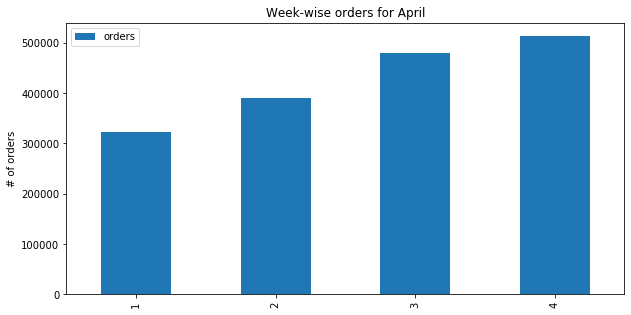

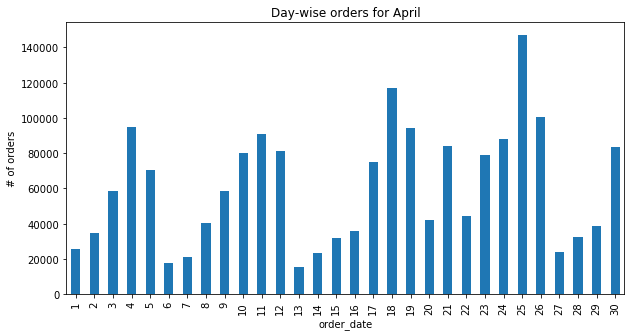

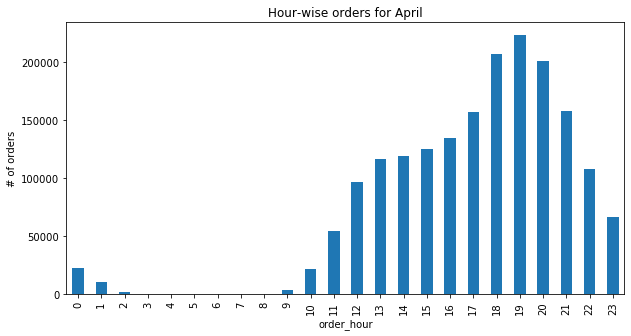

In [528]:
print('Total # of orders = ', total_orders, '\n')

weekwise_orders.plot(kind='bar', figsize=(10,5))
plt.title('Week-wise orders for April')
plt.ylabel('# of orders')
plt.show()
# Due to COVID

daywise_orders.plot(kind='bar', figsize=(10,5))
plt.title('Day-wise orders for April')
plt.ylabel('# of orders')
plt.show()

hourwise_orders.plot(kind='bar', figsize=(10,5))
plt.title('Hour-wise orders for April')
plt.ylabel('# of orders')
plt.show()
# Check for TZ

Total Revenue =  60610125.61560712 



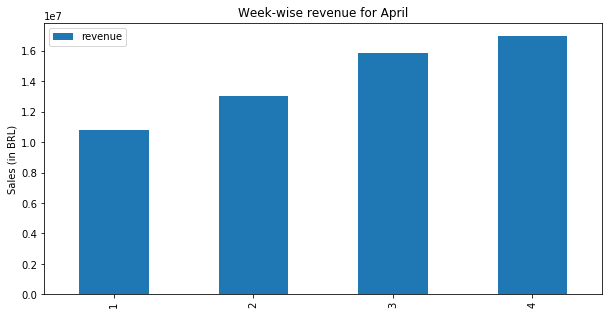

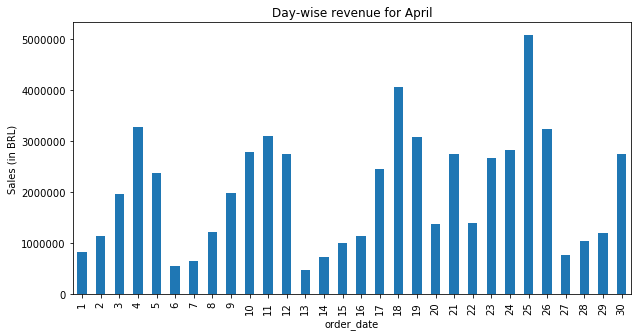

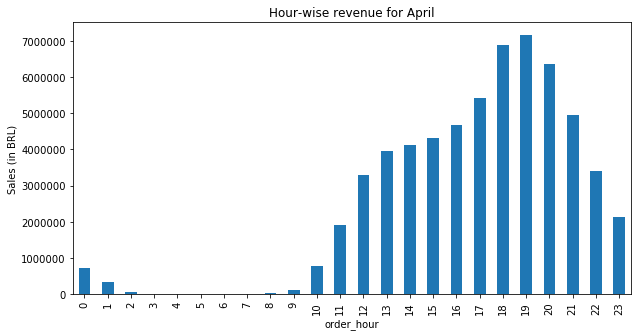

In [529]:
print('Total Revenue = ', total_revenue, '\n')

weekwise_sales.plot(kind='bar', figsize=(10,5))
plt.title('Week-wise revenue for April')
plt.ylabel('Sales (in BRL)')
plt.show()

daywise_sales.plot(kind='bar', figsize=(10,5))
plt.title('Day-wise revenue for April')
plt.ylabel('Sales (in BRL)')
plt.show()

hourwise_sales.plot(kind='bar', figsize=(10,5))
plt.title('Hour-wise revenue for April')
plt.ylabel('Sales (in BRL)')
plt.show()

In [530]:
best_drinks = data_df.groupby(['product_nk']).count().iloc[:,-8]
best_drinks

product_nk
8416     178
8417      76
8418     111
8419      68
8420     236
        ... 
10824      1
10825      1
10826     38
10827     27
10860     24
Name: sku, Length: 1012, dtype: int64

In [531]:
best_drinks = pd.DataFrame(best_drinks.values, index = best_drinks.index, columns = ['count'])
best_drinks.sort_values(by='count', ascending=False, inplace=True)
best_drinks = pd.merge(best_drinks, df2, how='left', on='product_nk')
best_drinks.drop(columns=['sku', 'units_per_sku', 'is_returnable_glass_bottle', 'product_id'], inplace=True)
best_drinks

,product_nk,count,is_abi,name,category,brand
0,8517,107014,True,Brahma 473ml - Unidade,Cervejas,Brahma
1,9468,89668,True,Skol Puro Malte 473ml - Unidade,Cervejas,Skol
2,8502,81079,True,Skol 269ml,Cervejas,Skol
3,8511,78019,True,Brahma 269ml,Cervejas,Brahma
4,8577,56473,True,Budweiser 269ml,Cervejas,Budweiser
...,...,...,...,...,...,...
1007,8684,1,True,Bohemia Aura Lager 300ml - Unidade,Cervejas,Bohemia
1008,9380,1,False,Cachaça Mineira Segredo da Chácara Ouro 900ml,Destilados,Not Listed
1009,9376,1,False,Cachaça Florete Blue 500ml,Destilados,Not Listed
1010,9038,1,False,Cesta para Cerveja Retornável de 1L,Outros,Not Listed


In [532]:
best_drinks_top = best_drinks.iloc[:10, :]
best_drinks_top['name']

0             Brahma 473ml - Unidade
1    Skol Puro Malte 473ml - Unidade
2                         Skol 269ml
3                       Brahma 269ml
4                    Budweiser 269ml
5                         Skol 473ml
6           Brahma Duplo Malte 350ml
7             Brahma 550ml - Unidade
8                Skol Beats GT 269ml
9          Budweiser 350ml - Unidade
Name: name, dtype: object

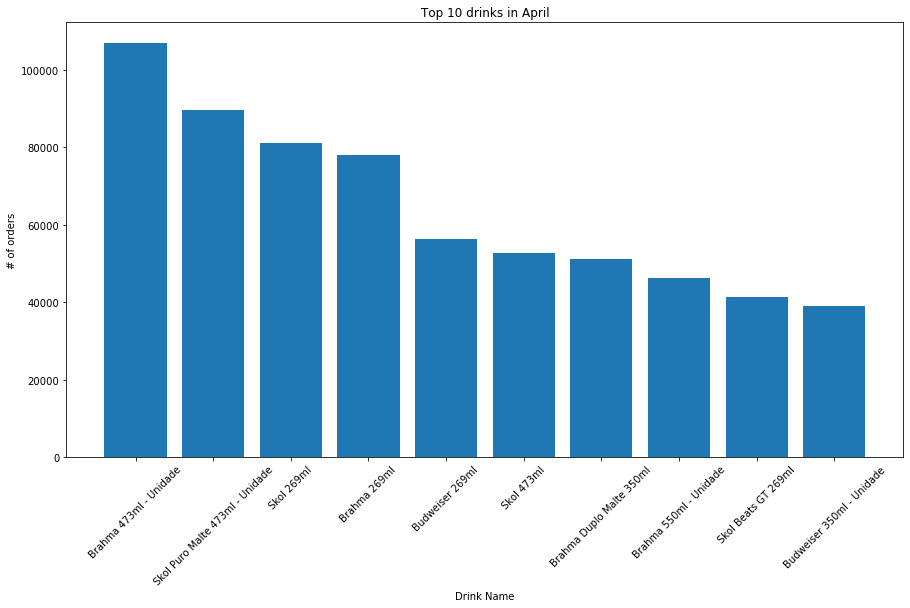

In [533]:
best_drinks_top = best_drinks.iloc[:10, :]
ax = plt.figure(figsize=(15,8))
plt.bar(best_drinks_top.name, height=best_drinks_top['count'])
plt.xticks(rotation=45)
plt.title('Top 10 drinks in April')
plt.ylabel('# of orders')
plt.xlabel('Drink Name')
plt.show()

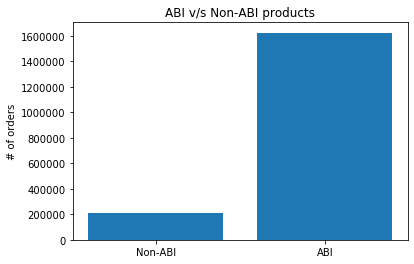

In [534]:
abi =  data_df.groupby(['is_abi']).count()
plt.bar(['Non-ABI', 'ABI'], height=abi.order_nk)
plt.title('ABI v/s Non-ABI products')
plt.ylabel('# of orders')
plt.show()
# Plot percentage

# Also see the trend of share of abi v/s non-abi products, outperforming etc.
# Pie-chart with number of orders from each customers

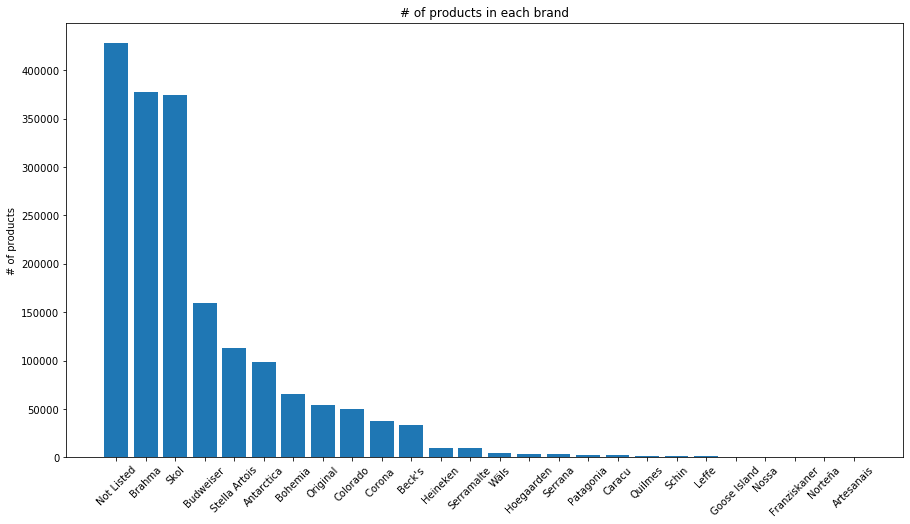

In [535]:
brand =  data_df.groupby(['brand']).count()
brand.sort_values(by='product_nk', ascending=False, inplace=True)
ax = plt.figure(figsize=(15,8))
plt.bar(brand.index, height=brand['product_nk'])
plt.title('# of products in each brand')
plt.ylabel('# of products')
plt.xticks(rotation=45)
plt.show()
# Flag why 30 percent are not listed

# Items in current order, previous order, intersection, %age of current items repeated for products and brands
# Show liking/ sticking of a brand 
# Compare with gap between orders of same order
# Buying immediately with lesser gap, not consistent, might be stocking other brands
# Normalise the intersection - recall %
# eg - 2/4 products repeated from previous order
# Calculate the gap
# Aliveness probability score (instead of gap score) - standardised
# Are there any items, whose customers tend to repeat multiple times
# Loyal customers to which brand
# Item purchased along with a brand
# Which beers go together - check websites for mixed pack info, data might get skewed

In [546]:
cust_day = data_df.groupby(['order_date'])[['is_new', 'is_return']].sum()

cust_week = pd.DataFrame(columns=['users_new', 'users_return'], index=[1,2,3,4])
for i in range(4):
    calc = cust_day.is_new.iloc[7*i:7*(i+1)].rolling(7).sum().values
    calc1 = cust_day.is_return.iloc[7*i:7*(i+1)].rolling(7).sum().values
    cust_week.users_new.iloc[i] = calc[-1]
    cust_week.users_return.iloc[i] = calc1[-1]   
    
apr_cust = []
sum1 = cust_week['users_new'].rolling(4).sum().values
apr_cust += [sum1[-1]]
sum2 = cust_week['users_return'].rolling(4).sum().values
apr_cust += [sum2[-1]]
    
# cust_week
# apr_cust

c:\program files\python38\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,users_new,users_return
1,224754,98215
2,168948,221330
3,162111,317880
4,155200,359115


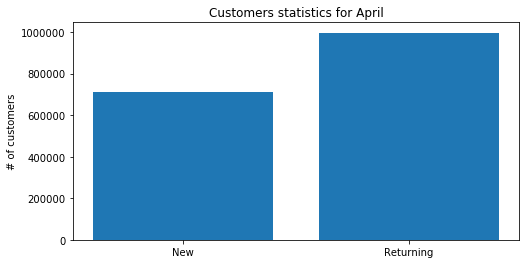

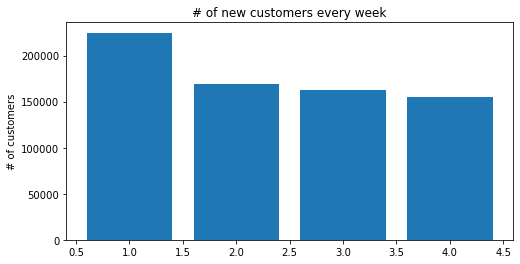

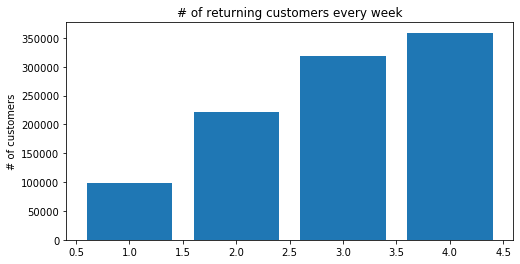

In [554]:
ax = plt.figure(figsize=(8,4))
plt.bar(['New', 'Returning'], height=apr_cust)
plt.title('Customers statistics for April')
plt.ylabel('# of customers')
plt.show()

ax = plt.figure(figsize=(8,4))
plt.bar(cust_week.index, height=cust_week['users_new'])
plt.title('# of new customers every week')
plt.ylabel('# of customers')
plt.show()

ax = plt.figure(figsize=(8,4))
plt.bar(cust_week.index, height=cust_week['users_return'])
plt.title('# of returning customers every week')
plt.ylabel('# of customers')
plt.show()

#Day-wise new customers - for holiday / discount trends
# Steer your EDA related to intern task

In [562]:
new_cust_drinks = data_df.groupby(['product_nk'])['is_new', 'is_return'].sum()
new_cust_drinks.sort_values(by=['is_new'], ascending=False, inplace=True)
new_cust_drinks = new_cust_drinks.iloc[:10,:]
new_cust_drinks = pd.merge(new_cust_drinks, df2, how='left', on='product_nk')
new_cust_drinks.drop(columns=['sku', 'units_per_sku', 'is_returnable_glass_bottle', 'product_id'], inplace=True)
new_cust_drinks

,product_nk,is_new,is_return,is_abi,name,category,brand
0,8517,41311,65703,True,Brahma 473ml - Unidade,Cervejas,Brahma
1,8502,32708,48371,True,Skol 269ml,Cervejas,Skol
2,8511,29230,48789,True,Brahma 269ml,Cervejas,Brahma
3,9468,28522,61146,True,Skol Puro Malte 473ml - Unidade,Cervejas,Skol
4,8577,23701,32772,True,Budweiser 269ml,Cervejas,Budweiser
5,10096,20236,21187,True,Skol Beats GT 269ml,Destilados,Skol
6,10266,19136,32104,True,Brahma Duplo Malte 350ml,Cervejas,Brahma
7,8508,18828,33842,True,Skol 473ml,Cervejas,Skol
8,8519,17056,29190,True,Brahma 550ml - Unidade,Cervejas,Brahma
9,8579,16470,22487,True,Budweiser 350ml - Unidade,Cervejas,Budweiser


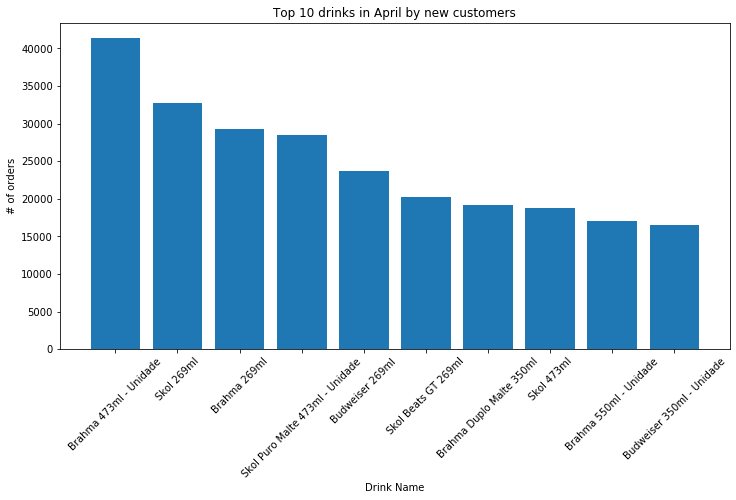

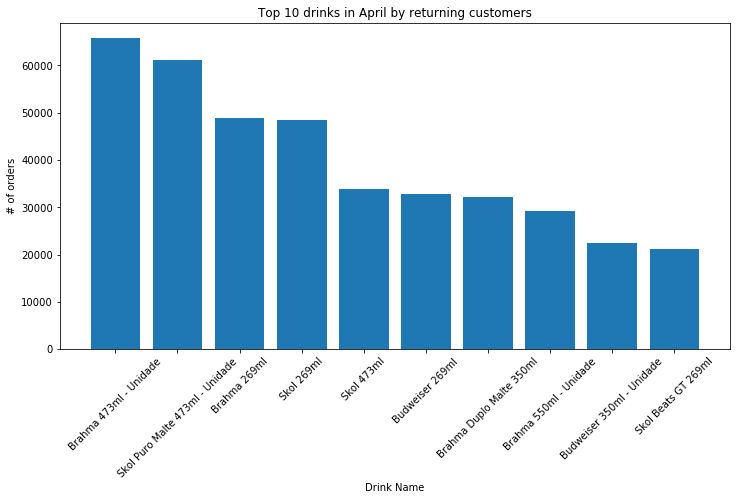

In [563]:
ax = plt.figure(figsize=(12,6))
plt.bar(new_cust_drinks.name, height=new_cust_drinks.is_new)
plt.xticks(rotation=45)
plt.title('Top 10 drinks in April by new customers')
plt.ylabel('# of orders')
plt.xlabel('Drink Name')
plt.show()

new_cust_drinks.sort_values(by=['is_return'], ascending=False, inplace=True)
ax = plt.figure(figsize=(12,6))
plt.bar(new_cust_drinks.name, height=new_cust_drinks.is_return)
plt.xticks(rotation=45)
plt.title('Top 10 drinks in April by returning customers')
plt.ylabel('# of orders')
plt.xlabel('Drink Name')
plt.show()

> Thank You

In [ ]:
for i in range(18):
    print('t1.'+listing[i]+' = coalesce('+'t2.'+listing[i]+', t1.'+listing[i])